In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Bankaladesh_2020

In [5]:
Bankaladesh_2020

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
7,7,Afif Hossain (BAN),1,1,0,7,7,7.00,4,175.00,...,12,1,1/12,12.00,6.00,12.0,0,0,0,0
16,16,Al-Amin Hossain (BAN),1,-,-,-,-,-,-,-,...,85,1,1/85,85.00,8.50,60.0,0,0,0,0
122,122,Liton Das (BAN),3,3,1,311,176,155.50,262,118.70,...,-,-,-,-,-,-,-,-,3,0
128,128,Mahmudullah (BAN),3,3,0,76,41,25.33,89,85.39,...,34,0,-,-,4.85,-,0,0,3,0
133,133,Mashrafe Mortaza (BAN),3,2,1,1,1,1.00,4,25.00,...,134,4,2/35,33.50,6.04,33.2,0,0,1,0
138,138,Mehidy Hasan Miraz (BAN),3,2,0,12,7,6.00,10,120.00,...,105,3,2/33,35.00,4.56,46.0,0,0,2,0
143,143,Mohammad Mithun (BAN),3,2,1,82,50,82.00,59,138.98,...,-,-,-,-,-,-,-,-,1,0
145,145,Mohammad Naim (BAN),1,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,2,0
147,147,Mohammad Saifuddin (BAN),2,1,1,28,28*,-,15,186.66,...,63,7,4/41,9.00,4.66,11.5,1,0,1,0
154,154,Mushfiqur Rahim (BAN),2,2,0,74,55,37.00,76,97.36,...,-,-,-,-,-,-,-,-,0,0


In [6]:
Bankaladesh_2020=Bankaladesh_2020.reset_index()

In [7]:
Bankaladesh_2020

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,7,7,Afif Hossain (BAN),1,1,0,7,7,7.00,4,...,12,1,1/12,12.00,6.00,12.0,0,0,0,0
1,16,16,Al-Amin Hossain (BAN),1,-,-,-,-,-,-,...,85,1,1/85,85.00,8.50,60.0,0,0,0,0
2,122,122,Liton Das (BAN),3,3,1,311,176,155.50,262,...,-,-,-,-,-,-,-,-,3,0
3,128,128,Mahmudullah (BAN),3,3,0,76,41,25.33,89,...,34,0,-,-,4.85,-,0,0,3,0
4,133,133,Mashrafe Mortaza (BAN),3,2,1,1,1,1.00,4,...,134,4,2/35,33.50,6.04,33.2,0,0,1,0
5,138,138,Mehidy Hasan Miraz (BAN),3,2,0,12,7,6.00,10,...,105,3,2/33,35.00,4.56,46.0,0,0,2,0
6,143,143,Mohammad Mithun (BAN),3,2,1,82,50,82.00,59,...,-,-,-,-,-,-,-,-,1,0
7,145,145,Mohammad Naim (BAN),1,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,2,0
8,147,147,Mohammad Saifuddin (BAN),2,1,1,28,28*,-,15,...,63,7,4/41,9.00,4.66,11.5,1,0,1,0
9,154,154,Mushfiqur Rahim (BAN),2,2,0,74,55,37.00,76,...,-,-,-,-,-,-,-,-,0,0


In [8]:
Bankaladesh_2020.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Bankaladesh_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,Afif Hossain (BAN),1,1,0,7,7,7.00,4,175.00,0,...,12,1,1/12,12.00,6.00,12.0,0,0,0,0
1,Al-Amin Hossain (BAN),1,-,-,-,-,-,-,-,-,...,85,1,1/85,85.00,8.50,60.0,0,0,0,0
2,Liton Das (BAN),3,3,1,311,176,155.50,262,118.70,2,...,-,-,-,-,-,-,-,-,3,0
3,Mahmudullah (BAN),3,3,0,76,41,25.33,89,85.39,0,...,34,0,-,-,4.85,-,0,0,3,0
4,Mashrafe Mortaza (BAN),3,2,1,1,1,1.00,4,25.00,0,...,134,4,2/35,33.50,6.04,33.2,0,0,1,0
5,Mehidy Hasan Miraz (BAN),3,2,0,12,7,6.00,10,120.00,0,...,105,3,2/33,35.00,4.56,46.0,0,0,2,0
6,Mohammad Mithun (BAN),3,2,1,82,50,82.00,59,138.98,0,...,-,-,-,-,-,-,-,-,1,0
7,Mohammad Naim (BAN),1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,2,0
8,Mohammad Saifuddin (BAN),2,1,1,28,28*,-,15,186.66,0,...,63,7,4/41,9.00,4.66,11.5,1,0,1,0
9,Mushfiqur Rahim (BAN),2,2,0,74,55,37.00,76,97.36,0,...,-,-,-,-,-,-,-,-,0,0


In [10]:
Bankaladesh_2020_players =Bankaladesh_2020.copy()

In [11]:
Bankaladesh_2020_players.drop('Player',axis=1,inplace=True)

In [12]:
Bankaladesh_2020_players.HS=Bankaladesh_2020_players.HS.str.extract('(\d+)')
Bankaladesh_2020_players['HS'].fillna(value=0, inplace=True)


In [13]:
Bankaladesh_2020_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,1,1,0,7,7,7.00,4,175.00,0,0,...,12,1,1/12,12.00,6.00,12.0,0,0,0,0
1,1,-,-,-,0,-,-,-,-,-,...,85,1,1/85,85.00,8.50,60.0,0,0,0,0
2,3,3,1,311,176,155.50,262,118.70,2,0,...,-,-,-,-,-,-,-,-,3,0
3,3,3,0,76,41,25.33,89,85.39,0,0,...,34,0,-,-,4.85,-,0,0,3,0
4,3,2,1,1,1,1.00,4,25.00,0,0,...,134,4,2/35,33.50,6.04,33.2,0,0,1,0
5,3,2,0,12,7,6.00,10,120.00,0,0,...,105,3,2/33,35.00,4.56,46.0,0,0,2,0
6,3,2,1,82,50,82.00,59,138.98,0,1,...,-,-,-,-,-,-,-,-,1,0
7,1,-,-,-,0,-,-,-,-,-,...,-,-,-,-,-,-,-,-,2,0
8,2,1,1,28,28,-,15,186.66,0,0,...,63,7,4/41,9.00,4.66,11.5,1,0,1,0
9,2,2,0,74,55,37.00,76,97.36,0,1,...,-,-,-,-,-,-,-,-,0,0


In [14]:
Bankaladesh_2020_players.replace("-",0,inplace=True)

In [15]:
Bankaladesh_2020_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Bankaladesh_2020_players_scaled = pd.DataFrame(scaler.fit_transform(Bankaladesh_2020_players),columns=Bankaladesh_2020_players.columns)
Bankaladesh_2020_players_scaled.shape
Bankaladesh_2020_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.441153,-0.520756,-0.816497,-0.550060,-0.555040,-0.482942,-0.592040,1.509953,-0.392232,-0.392232,...,-0.369274,-0.710353,-0.297482,-0.290663,0.831471,-0.314434,-0.267261,0.0,-0.797081,0.0
1,-1.441153,-1.497172,-0.816497,-0.619147,-0.683976,-0.615921,-0.636387,-1.326537,-0.392232,-0.392232,...,-0.369274,0.845321,-0.297482,2.429647,1.646000,1.933756,-0.267261,0.0,-0.797081,0.0
2,0.960769,1.432078,1.224745,2.450268,2.557849,2.338114,2.268376,0.597413,2.549510,-0.392232,...,-0.369274,-0.966081,-0.743705,-0.737838,-1.123398,-0.876482,-0.267261,0.0,1.962046,0.0
3,0.960769,1.432078,-0.816497,0.130935,0.071222,-0.134727,0.350346,0.057508,-0.392232,-0.392232,...,-0.369274,-0.241520,-0.743705,-0.737838,0.456788,-0.876482,-0.267261,0.0,1.962046,0.0
4,0.960769,0.455661,1.224745,-0.609277,-0.665556,-0.596924,-0.592040,-0.921324,-0.392232,-0.392232,...,-0.369274,1.889540,1.041187,0.510524,0.844504,0.678517,-0.267261,0.0,0.122628,0.0


In [17]:
Bankaladesh_2020_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,15.000000,1.500000e+01,...,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,15.0,1.500000e+01,15.0
mean,-1.776357e-16,-5.921189e-17,-4.440892e-17,-2.960595e-17,2.960595e-17,2.960595e-17,2.960595e-17,-2.294461e-16,0.000000,1.480297e-17,...,-1.480297e-17,-7.401487e-17,-5.181041e-17,-2.220446e-17,-1.480297e-17,8.881784e-17,2.220446e-17,0.0,1.480297e-17,0.0
std,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098,1.035098e+00,...,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,0.0,1.035098e+00,0.0
min,-1.441153e+00,-1.497172e+00,-8.164966e-01,-6.191468e-01,-6.839759e-01,-6.159211e-01,-6.363871e-01,-1.326537e+00,-0.392232,-3.922323e-01,...,-3.692745e-01,-9.660806e-01,-7.437051e-01,-7.378375e-01,-1.123398e+00,-8.764822e-01,-2.672612e-01,0.0,-7.970811e-01,0.0
25%,-8.406728e-01,-5.207556e-01,-8.164966e-01,-6.142120e-01,-6.747662e-01,-6.159211e-01,-6.086699e-01,-1.123931e+00,-0.392232,-3.922323e-01,...,-3.692745e-01,-9.660806e-01,-7.437051e-01,-7.378375e-01,-1.123398e+00,-8.764822e-01,-2.672612e-01,0.0,-7.970811e-01,0.0
50%,-2.401922e-01,4.556612e-01,-8.164966e-01,-5.007127e-01,-5.550397e-01,-5.019391e-01,-5.255183e-01,2.515237e-01,-0.392232,-3.922323e-01,...,-3.692745e-01,-2.415202e-01,-2.974821e-01,-4.024568e-01,3.427538e-01,-3.378531e-01,-2.672612e-01,0.0,-7.970811e-01,0.0
75%,9.607689e-01,4.556612e-01,1.224745e+00,1.210659e-01,1.541095e-01,-2.387924e-02,1.119775e-01,6.079489e-01,-0.392232,-3.922323e-01,...,-3.692745e-01,7.494228e-01,3.718526e-01,3.894143e-01,6.441295e-01,7.440888e-01,-2.672612e-01,0.0,5.824824e-01,0.0
max,9.607689e-01,1.432078e+00,1.224745e+00,2.450268e+00,2.557849e+00,2.338114e+00,2.556635e+00,1.698944e+00,2.549510,2.549510e+00,...,3.323470e+00,1.889540e+00,2.379856e+00,2.429647e+00,1.646000e+00,1.933756e+00,3.741657e+00,0.0,1.962046e+00,0.0


In [18]:
X =  Bankaladesh_2020_players_scaled.iloc[:,:].values

In [19]:
X

array([[-1.44115338, -0.52075564, -0.81649658, -0.55006024, -0.55503968,
        -0.48294204, -0.59203957,  1.50995266, -0.39223227, -0.39223227,
        -0.26726124, -0.44910847, -0.594803  , -2.25771556, -1.44115338,
        -0.17149859, -0.69269141, -0.36927447, -0.71035341, -0.29748206,
        -0.29066327,  0.83147111, -0.31443449, -0.26726124,  0.        ,
        -0.79708114,  0.        ],
       [-1.44115338, -1.49717248, -0.81649658, -0.61914675, -0.68397589,
        -0.61592113, -0.6363871 , -1.32653712, -0.39223227, -0.39223227,
        -0.26726124, -0.54965514, -0.594803  , -2.10447695, -1.44115338,
        -0.17149859,  0.16958006, -0.36927447,  0.84532056, -0.29748206,
         2.42964683,  1.64600003,  1.93375649, -0.26726124,  0.        ,
        -0.79708114,  0.        ],
       [ 0.96076892,  1.43207802,  1.22474487,  2.45026833,  2.5578488 ,
         2.33811427,  2.26837633,  0.59741337,  2.54950976, -0.39223227,
        -0.26726124,  2.56729171,  2.59164166, -0.2996

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Bankaladesh_2020_players_scaled))

False

In [23]:
Bankaladesh_2020_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.441153,-0.520756,-0.816497,-0.550060,-0.555040,-0.482942,-0.592040,1.509953,-0.392232,-0.392232,...,-0.369274,-0.710353,-0.297482,-0.290663,0.831471,-0.314434,-0.267261,0.0,-0.797081,0.0
1,-1.441153,-1.497172,-0.816497,-0.619147,-0.683976,-0.615921,-0.636387,-1.326537,-0.392232,-0.392232,...,-0.369274,0.845321,-0.297482,2.429647,1.646000,1.933756,-0.267261,0.0,-0.797081,0.0
2,0.960769,1.432078,1.224745,2.450268,2.557849,2.338114,2.268376,0.597413,2.549510,-0.392232,...,-0.369274,-0.966081,-0.743705,-0.737838,-1.123398,-0.876482,-0.267261,0.0,1.962046,0.0
3,0.960769,1.432078,-0.816497,0.130935,0.071222,-0.134727,0.350346,0.057508,-0.392232,-0.392232,...,-0.369274,-0.241520,-0.743705,-0.737838,0.456788,-0.876482,-0.267261,0.0,1.962046,0.0
4,0.960769,0.455661,1.224745,-0.609277,-0.665556,-0.596924,-0.592040,-0.921324,-0.392232,-0.392232,...,-0.369274,1.889540,1.041187,0.510524,0.844504,0.678517,-0.267261,0.0,0.122628,0.0
5,0.960769,0.455661,-0.816497,-0.500713,-0.555040,-0.501939,-0.525518,0.618484,-0.392232,-0.392232,...,1.477098,1.271533,0.594964,0.566421,0.362302,1.278034,-0.267261,0.0,1.042337,0.0
6,0.960769,0.455661,1.224745,0.190152,0.236997,0.941834,0.017739,0.926122,-0.392232,2.549510,...,-0.369274,-0.966081,-0.743705,-0.737838,-1.123398,-0.876482,-0.267261,0.0,0.122628,0.0
7,-1.441153,-1.497172,-0.816497,-0.619147,-0.683976,-0.615921,-0.636387,-1.326537,-0.392232,-0.392232,...,-0.369274,-0.966081,-0.743705,-0.737838,-1.123398,-0.876482,-0.267261,0.0,1.042337,0.0
8,-0.240192,-0.520756,1.224745,-0.342801,-0.168231,-0.615921,-0.470084,1.698944,-0.392232,-0.392232,...,-0.369274,0.376487,2.379856,-0.402457,0.394884,-0.337853,3.741657,0.0,0.122628,0.0
9,-0.240192,0.455661,-0.816497,0.111196,0.329094,0.086968,0.206216,0.251524,-0.392232,2.549510,...,-0.369274,-0.966081,-0.743705,-0.737838,-1.123398,-0.876482,-0.267261,0.0,-0.797081,0.0


In [24]:
np.all(np.isfinite(Bankaladesh_2020_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


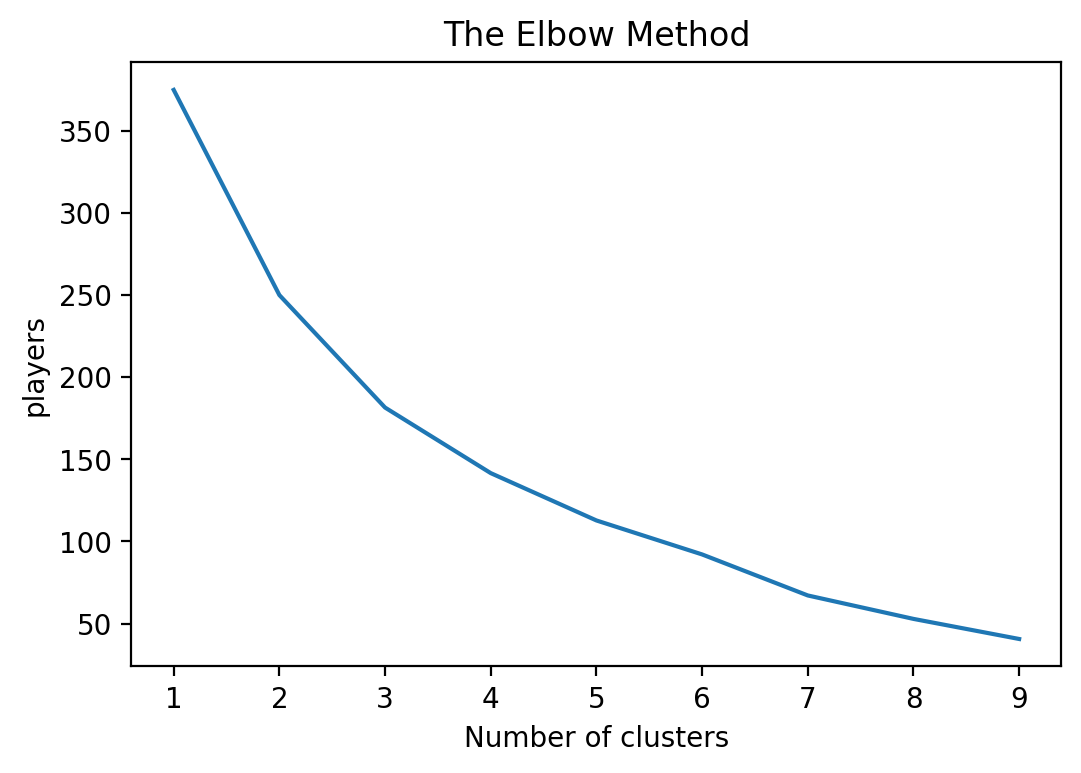

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 0])

In [28]:
kmeans.cluster_centers_

array([[ 0.96076892,  1.43207802,  1.22474487,  2.44533358,  2.39207368,
         2.33336502,  2.41250581,  0.50769925,  2.54950976, -0.39223227,
        -0.26726124,  2.46674503,  2.43231943,  0.56017226,  0.96076892,
        -1.02899151, -0.90825928, -0.36927447, -0.96608064, -0.74370515,
        -0.73783753, -1.12339828, -0.87648223, -0.26726124,  0.        ,
         0.58248237,  0.        ],
       [-0.06862635, -0.52075564,  0.05832118, -0.55429002, -0.57609049,
        -0.59692412, -0.58095269, -0.32702759, -0.39223227, -0.39223227,
         0.30544142, -0.54965514, -0.41272045,  0.08221373, -0.06862635,
         0.80849333,  0.89943126,  0.42202797,  0.96405106,  0.78620258,
         0.77936086,  0.77887582,  0.92140145,  0.30544142,  0.        ,
        -0.27153314,  0.        ],
       [-0.24019223,  0.13018891, -0.47628967, -0.1684395 , -0.12525232,
        -0.08137687, -0.12639047,  0.2122991 , -0.39223227,  0.58834841,
        -0.26726124, -0.18098401, -0.32926595, -0.2826

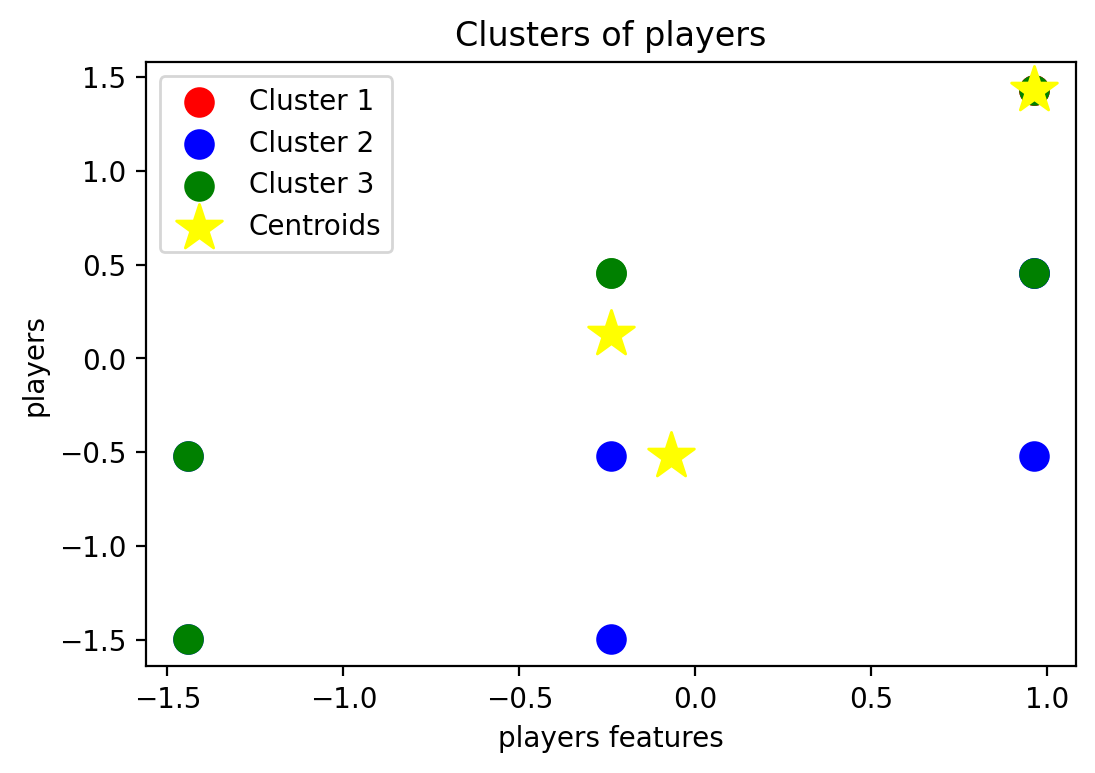

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Bankaladesh_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,Afif Hossain (BAN),1,1,0,7,7,7.00,4,175.00,0,...,12,1,1/12,12.00,6.00,12.0,0,0,0,0
1,Al-Amin Hossain (BAN),1,-,-,-,-,-,-,-,-,...,85,1,1/85,85.00,8.50,60.0,0,0,0,0
2,Liton Das (BAN),3,3,1,311,176,155.50,262,118.70,2,...,-,-,-,-,-,-,-,-,3,0
3,Mahmudullah (BAN),3,3,0,76,41,25.33,89,85.39,0,...,34,0,-,-,4.85,-,0,0,3,0
4,Mashrafe Mortaza (BAN),3,2,1,1,1,1.00,4,25.00,0,...,134,4,2/35,33.50,6.04,33.2,0,0,1,0
5,Mehidy Hasan Miraz (BAN),3,2,0,12,7,6.00,10,120.00,0,...,105,3,2/33,35.00,4.56,46.0,0,0,2,0
6,Mohammad Mithun (BAN),3,2,1,82,50,82.00,59,138.98,0,...,-,-,-,-,-,-,-,-,1,0
7,Mohammad Naim (BAN),1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,2,0
8,Mohammad Saifuddin (BAN),2,1,1,28,28*,-,15,186.66,0,...,63,7,4/41,9.00,4.66,11.5,1,0,1,0
9,Mushfiqur Rahim (BAN),2,2,0,74,55,37.00,76,97.36,0,...,-,-,-,-,-,-,-,-,0,0


In [31]:
Bankaladesh_2020["cluster"] = y_kmeans

In [32]:
Bankaladesh_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,Afif Hossain (BAN),1,1,0,7,7,7.00,4,175.00,0,...,1,1/12,12.00,6.00,12.0,0,0,0,0,2
1,Al-Amin Hossain (BAN),1,-,-,-,-,-,-,-,-,...,1,1/85,85.00,8.50,60.0,0,0,0,0,1
2,Liton Das (BAN),3,3,1,311,176,155.50,262,118.70,2,...,-,-,-,-,-,-,-,3,0,0
3,Mahmudullah (BAN),3,3,0,76,41,25.33,89,85.39,0,...,0,-,-,4.85,-,0,0,3,0,2
4,Mashrafe Mortaza (BAN),3,2,1,1,1,1.00,4,25.00,0,...,4,2/35,33.50,6.04,33.2,0,0,1,0,1
5,Mehidy Hasan Miraz (BAN),3,2,0,12,7,6.00,10,120.00,0,...,3,2/33,35.00,4.56,46.0,0,0,2,0,1
6,Mohammad Mithun (BAN),3,2,1,82,50,82.00,59,138.98,0,...,-,-,-,-,-,-,-,1,0,2
7,Mohammad Naim (BAN),1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,2,0,2
8,Mohammad Saifuddin (BAN),2,1,1,28,28*,-,15,186.66,0,...,7,4/41,9.00,4.66,11.5,1,0,1,0,1
9,Mushfiqur Rahim (BAN),2,2,0,74,55,37.00,76,97.36,0,...,-,-,-,-,-,-,-,0,0,2


In [33]:
Bankaladesh_2020['cluster'].value_counts()

1    7
2    6
0    2
Name: cluster, dtype: int64

In [34]:
Bankaladesh_Cluster_2020 = np.array([2,7,6])

In [35]:
Bankaladesh_Cluster_2020

array([2, 7, 6])

In [36]:
%store Bankaladesh_Cluster_2020

Stored 'Bankaladesh_Cluster_2020' (ndarray)


In [37]:
Bankaladesh_2020_players_scaled.insert(0, 'Player', Bankaladesh_2020.Player)

In [38]:
Bankaladesh_2020_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,Afif Hossain (BAN),-1.441153,-0.520756,-0.816497,-0.550060,-0.555040,-0.482942,-0.592040,1.509953,-0.392232,...,-0.369274,-0.710353,-0.297482,-0.290663,0.831471,-0.314434,-0.267261,0.0,-0.797081,0.0
1,Al-Amin Hossain (BAN),-1.441153,-1.497172,-0.816497,-0.619147,-0.683976,-0.615921,-0.636387,-1.326537,-0.392232,...,-0.369274,0.845321,-0.297482,2.429647,1.646000,1.933756,-0.267261,0.0,-0.797081,0.0
2,Liton Das (BAN),0.960769,1.432078,1.224745,2.450268,2.557849,2.338114,2.268376,0.597413,2.549510,...,-0.369274,-0.966081,-0.743705,-0.737838,-1.123398,-0.876482,-0.267261,0.0,1.962046,0.0
3,Mahmudullah (BAN),0.960769,1.432078,-0.816497,0.130935,0.071222,-0.134727,0.350346,0.057508,-0.392232,...,-0.369274,-0.241520,-0.743705,-0.737838,0.456788,-0.876482,-0.267261,0.0,1.962046,0.0
4,Mashrafe Mortaza (BAN),0.960769,0.455661,1.224745,-0.609277,-0.665556,-0.596924,-0.592040,-0.921324,-0.392232,...,-0.369274,1.889540,1.041187,0.510524,0.844504,0.678517,-0.267261,0.0,0.122628,0.0
5,Mehidy Hasan Miraz (BAN),0.960769,0.455661,-0.816497,-0.500713,-0.555040,-0.501939,-0.525518,0.618484,-0.392232,...,1.477098,1.271533,0.594964,0.566421,0.362302,1.278034,-0.267261,0.0,1.042337,0.0
6,Mohammad Mithun (BAN),0.960769,0.455661,1.224745,0.190152,0.236997,0.941834,0.017739,0.926122,-0.392232,...,-0.369274,-0.966081,-0.743705,-0.737838,-1.123398,-0.876482,-0.267261,0.0,0.122628,0.0
7,Mohammad Naim (BAN),-1.441153,-1.497172,-0.816497,-0.619147,-0.683976,-0.615921,-0.636387,-1.326537,-0.392232,...,-0.369274,-0.966081,-0.743705,-0.737838,-1.123398,-0.876482,-0.267261,0.0,1.042337,0.0
8,Mohammad Saifuddin (BAN),-0.240192,-0.520756,1.224745,-0.342801,-0.168231,-0.615921,-0.470084,1.698944,-0.392232,...,-0.369274,0.376487,2.379856,-0.402457,0.394884,-0.337853,3.741657,0.0,0.122628,0.0
9,Mushfiqur Rahim (BAN),-0.240192,0.455661,-0.816497,0.111196,0.329094,0.086968,0.206216,0.251524,-0.392232,...,-0.369274,-0.966081,-0.743705,-0.737838,-1.123398,-0.876482,-0.267261,0.0,-0.797081,0.0


In [39]:
Bankaladesh_2020_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,Afif Hossain (BAN),-0.482942,-0.290663
1,Al-Amin Hossain (BAN),-0.615921,2.429647
2,Liton Das (BAN),2.338114,-0.737838
3,Mahmudullah (BAN),-0.134727,-0.737838
4,Mashrafe Mortaza (BAN),-0.596924,0.510524
5,Mehidy Hasan Miraz (BAN),-0.501939,0.566421
6,Mohammad Mithun (BAN),0.941834,-0.737838
7,Mohammad Naim (BAN),-0.615921,-0.737838
8,Mohammad Saifuddin (BAN),-0.615921,-0.402457
9,Mushfiqur Rahim (BAN),0.086968,-0.737838


In [40]:
Bankaladesh_2020_Ave=Bankaladesh_2020_players_scaled.mean()

In [41]:
Bankaladesh_2020_Ave

Mat_x          -1.776357e-16
Inns_x         -5.921189e-17
NO             -4.440892e-17
Runs_x         -2.960595e-17
HS              2.960595e-17
Ave_x           2.960595e-17
BF              2.960595e-17
SR_x           -2.294461e-16
100             0.000000e+00
50              1.480297e-17
0               5.181041e-17
4s             -2.960595e-17
6s             -2.960595e-17
Unnamed: 0_y    1.480297e-16
Mat_y          -1.776357e-16
Inns_y          0.000000e+00
Overs           1.110223e-16
Mdns           -1.480297e-17
Runs_y         -7.401487e-17
Wkts           -5.181041e-17
Ave_y          -2.220446e-17
Econ           -1.480297e-17
SR_y            8.881784e-17
4               2.220446e-17
5               0.000000e+00
Ct              1.480297e-17
St              0.000000e+00
dtype: float64

In [42]:
Bankaladesh_Ave_2020 =Bankaladesh_2020_Ave[['Ave_x','Ave_y']]

In [43]:
Bankaladesh_Ave_2020

Ave_x    2.960595e-17
Ave_y   -2.220446e-17
dtype: float64

In [44]:
Bankaladesh_Ave_2020 = np.array([Bankaladesh_Ave_2020.Ave_x, Bankaladesh_Ave_2020.Ave_y])

In [45]:
Bankaladesh_Ave_2020

array([ 2.96059473e-17, -2.22044605e-17])

In [46]:
%store Bankaladesh_Ave_2020

Stored 'Bankaladesh_Ave_2020' (ndarray)


In [47]:
Bankaladesh_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,Afif Hossain (BAN),1,1,0,7,7,7.00,4,175.00,0,...,1,1/12,12.00,6.00,12.0,0,0,0,0,2
1,Al-Amin Hossain (BAN),1,-,-,-,-,-,-,-,-,...,1,1/85,85.00,8.50,60.0,0,0,0,0,1
2,Liton Das (BAN),3,3,1,311,176,155.50,262,118.70,2,...,-,-,-,-,-,-,-,3,0,0
3,Mahmudullah (BAN),3,3,0,76,41,25.33,89,85.39,0,...,0,-,-,4.85,-,0,0,3,0,2
4,Mashrafe Mortaza (BAN),3,2,1,1,1,1.00,4,25.00,0,...,4,2/35,33.50,6.04,33.2,0,0,1,0,1
5,Mehidy Hasan Miraz (BAN),3,2,0,12,7,6.00,10,120.00,0,...,3,2/33,35.00,4.56,46.0,0,0,2,0,1
6,Mohammad Mithun (BAN),3,2,1,82,50,82.00,59,138.98,0,...,-,-,-,-,-,-,-,1,0,2
7,Mohammad Naim (BAN),1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,2,0,2
8,Mohammad Saifuddin (BAN),2,1,1,28,28*,-,15,186.66,0,...,7,4/41,9.00,4.66,11.5,1,0,1,0,1
9,Mushfiqur Rahim (BAN),2,2,0,74,55,37.00,76,97.36,0,...,-,-,-,-,-,-,-,0,0,2
